<a href="https://www.kaggle.com/code/ziadhamadafathy/classification-minerals-with-accuracy-87?scriptVersionId=108673036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

# Preparing data

In [2]:
data = '../input/minerals-identification-classification/Minet 5640 Images/'

In [3]:
for folder in  os.listdir(data): 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 1155 in folder quartz
For data , found 975 in folder malachite
For data , found 0 in folder Minerals_5640.csv
For data , found 525 in folder chrysocolla
For data , found 1057 in folder pyrite
For data , found 335 in folder muscovite
For data , found 1025 in folder biotite
For data , found 410 in folder bornite


In [4]:
code = {'biotite':0 ,'bornite':1 ,'chrysocolla':2,'malachite':3, 'muscovite':4, 'pyrite':5, 'quartz':6}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [5]:
size = []
for folder in  os.listdir(data) : 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0         (542, 578, 3)
1         (640, 640, 3)
2       (1024, 1024, 3)
3         (384, 400, 3)
4       (1000, 1000, 3)
             ...       
5477      (400, 400, 3)
5478      (454, 500, 3)
5479      (230, 300, 3)
5480     (300, 1300, 3)
5481      (286, 560, 3)
Length: 5482, dtype: object>

In [6]:
s = 100

In [7]:
X_Images = []
y_Types = []
for folder in  os.listdir(data) : 
    files = gb.glob(pathname= str( data + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Images.append(list(image_array))
        y_Types.append(code[folder])

In [8]:
print(f'we have {len(X_Images)} items in X_Images')

we have 5482 items in X_Images


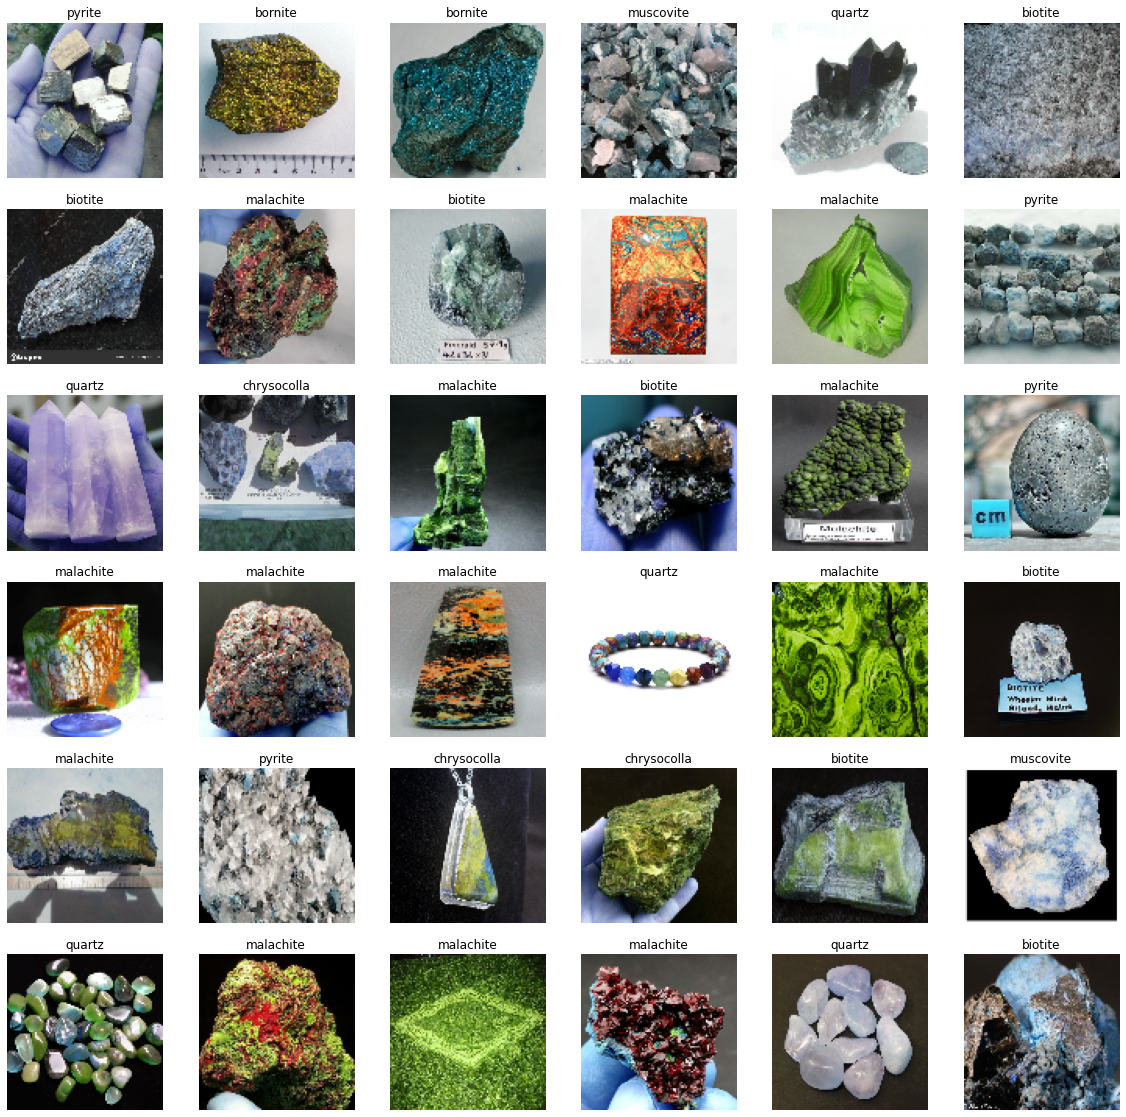

In [9]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Images[i])   
    plt.axis('off')
    plt.title(getcode(y_Types[i]))

# Spliting data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_Images, y_Types, train_size=0.85, 
                                                    shuffle=True, random_state=44)

In [11]:
X_train = np.array(X_train)
X_train = X_train / 255 
X_test = np.array(X_test)
X_test = X_test / 255
y_train = np.array(y_train)
y_test = np.array(y_test)

# Making and Training model

In [12]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(512,activation='relu') ,    
        keras.layers.Dense(512,activation='relu') ,    
        keras.layers.Dense(256,activation='relu') ,
        keras.layers.Dense(128,activation='relu') ,
        keras.layers.Dense(7,activation='softmax') ,    
        ])

2022-10-20 16:53:13.118010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 16:53:13.300584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 16:53:13.301446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 16:53:13.302697: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 512)       14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 256)       1179904   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [15]:
epochs = 20
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

2022-10-20 16:53:17.805729: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-10-20 16:53:19.413503: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


73/73 [==============================] - 30s 268ms/step - loss: 1.7136 - accuracy: 0.2754
Epoch 2/20
73/73 [==============================] - 17s 239ms/step - loss: 1.4906 - accuracy: 0.3969
Epoch 3/20
73/73 [==============================] - 17s 238ms/step - loss: 1.4128 - accuracy: 0.4572
Epoch 4/20
73/73 [==============================] - 17s 239ms/step - loss: 1.2335 - accuracy: 0.5587
Epoch 5/20
73/73 [==============================] - 17s 238ms/step - loss: 1.0861 - accuracy: 0.6222
Epoch 6/20
73/73 [==============================] - 17s 238ms/step - loss: 0.8668 - accuracy: 0.7062
Epoch 7/20
73/73 [==============================] - 17s 239ms/step - loss: 0.6863 - accuracy: 0.7740
Epoch 8/20
73/73 [==============================] - 17s 238ms/step - loss: 0.5532 - accuracy: 0.8188
Epoch 9/20
73/73 [==============================] - 17s 238ms/step - loss: 0.4416 - accuracy: 0.8613
Epoch 10/20
73/73 [==============================] - 17s 238ms/step - loss: 0.3278 - accuracy: 0.8914


# Accuracy of model

In [16]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

26/26 [==============================] - 4s 123ms/step - loss: 0.7080 - accuracy: 0.8615
Test Loss is 0.7079530358314514
Test Accuracy is 0.8614823818206787


# Predicting data

In [17]:
y_pred = KerasModel.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (823, 7)


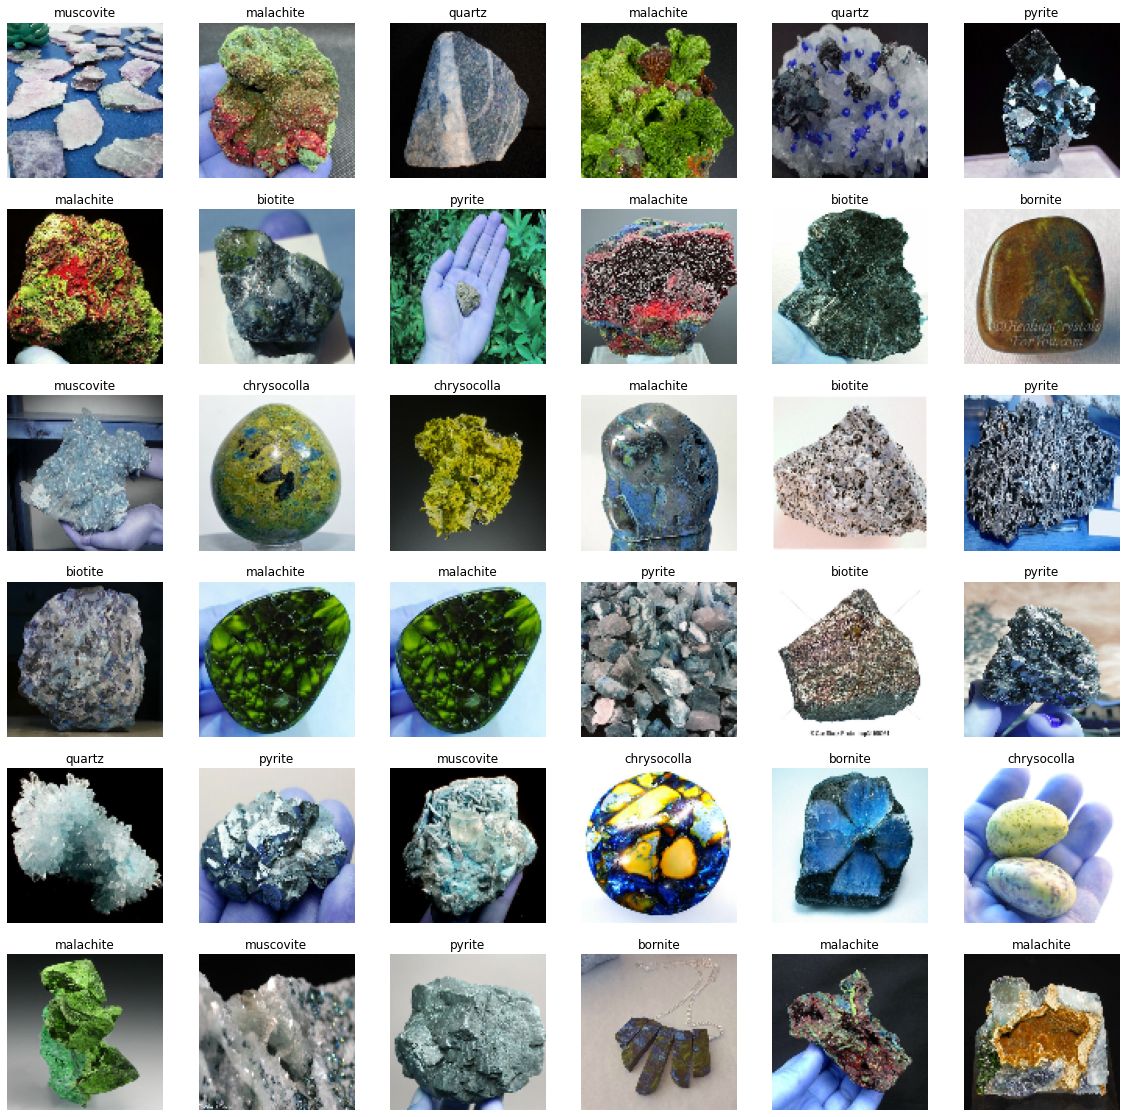

In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))